In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 
           'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 
           'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 
           'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 
           'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 
           'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 
           'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
           'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 
           'Q001', 'Q002', 'Q005', 
           'Q006', 'Q024', 'Q025']

In [3]:
ARQUIVO_CSV_MICRODADOS_ENEM_2019 = 'MICRODADOS_ENEM_2019.csv'
SEPARADOR = ';'
CODIFICACAO = 'ISO-8859-1'
EXPORT_CSV = True
EXPORT_FILE_NAME = 'preprocessed_data.csv'

In [4]:
dataset = pd.read_csv(ARQUIVO_CSV_MICRODADOS_ENEM_2019, sep=SEPARADOR, encoding = CODIFICACAO, usecols = columns)

In [5]:
dict_tp_sexo = {"F": "Feminino", 
                "M": "Masculino"}

dict_tp_cor_raca = {0: 'Não declarado', 
                    1:'Branca', 
                    2: 'Preta', 
                    3: 'Parda', 
                    4: 'Amarela', 
                    5: 'Indígena'}

dict_tp_estado_civil = {0: 'Não informado', 
                        1:'Solteiro(a)', 
                        2: 'Casado(a)/Mora com companheiro(a)', 
                        3: 'Divorciado(a)/Desquitado(a)/Separado(a)', 
                        4: 'Viúvo(a)'}

dict_tp_escola = {0: "Não informado",
                  1: "Pública",
                  2: "Privada",
                  3: "Exterior"}

dict_tp_ensino = {1: "Ensino Regular",
                  2: "Educação Especial - Modalidade Substitutiva",
                  3: "Educação de Jovens e Adultos"}

dict_in_treineiro = {0: "Não",
                     1: "Sim"}

dict_tp_dependencia_adm_esc = {1: "Federal",
                               2: "Estadual",
                               3: "Municipal",
                               4: "Privada"}

dict_tp_localizacao_esc = {1: "Urbana",
                           2: "Rural"}

dict_tp_status_redacao = {1: "Sem problemas",
                          2: "Anulada",
                          3: "Cópia Texto Motivador",
                          4: "Em Branco",
                          6: "Fuga ao tema",
                          7: "Não atendimento ao tipo textual",
                          8: "Texto insuficiente",
                          9: "Parte desconectada"}

dict_tp_lingua = {1: "Inglês",
                  0: "Espanhol"}

dict_q024 = {"A": "Não",
             "B": "Sim, um",
             "C": "Sim, dois",
             "D": "Sim, três",
             "E": "Sim, quatro ou mais"}

dict_q025 = {"A": "Não",
             "B": "Sim"}

In [6]:
dataset = dataset.replace({"TP_SEXO": dict_tp_sexo,
                           "TP_COR_RACA": dict_tp_cor_raca,
                           "TP_ESTADO_CIVIL": dict_tp_estado_civil,
                           "TP_ESCOLA": dict_tp_escola,
                           "TP_ENSINO": dict_tp_ensino,
                           "IN_TREINEIRO": dict_in_treineiro,
                           "TP_DEPENDENCIA_ADM_ESC": dict_tp_dependencia_adm_esc,
                           "TP_LOCALIZACAO_ESC": dict_tp_localizacao_esc,
                           "TP_STATUS_REDACAO": dict_tp_status_redacao,
                           "TP_LINGUA": dict_tp_lingua,
                           "Q024": dict_q024,
                           "Q025": dict_q025
                          })

In [7]:
dataset.columns

Index(['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q005', 'Q006',
       'Q024', 'Q025'],
      dtype='object')

In [8]:
# Criando o atribudo media geral
dataset['MEDIA_GERAL'] = (dataset['NU_NOTA_CN'] +dataset['NU_NOTA_CH'] + dataset['NU_NOTA_LC'] + dataset['NU_NOTA_MT'] + dataset['NU_NOTA_REDACAO']) /5

In [9]:
# Exportando CSV
if EXPORT_CSV:
    dataset.to_csv(EXPORT_FILE_NAME, index = False)

In [10]:
# Normalização redução do total de campos dos atributos Q001 e Q002.

In [11]:
dataset.Q001.value_counts()

E    1308991
B    1135816
C     723518
D     586620
H     444806
F     375721
A     290615
G     229183
Name: Q001, dtype: int64

In [12]:
dataset.Q001[(dataset.Q001=='A') | (dataset.Q001 == 'B') | (dataset.Q001 == 'C') | (dataset.Q001 == 'D') | (dataset.Q001 == 'H')] = 0
dataset.Q001[(dataset.Q001=='E')] = 1
dataset.Q001[(dataset.Q001=='F') | (dataset.Q001 == 'G')] = 2


/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [13]:
dataset.Q002.value_counts()

E    1633692
B     854826
C     686198
D     667415
F     513711
G     399470
A     194625
H     145333
Name: Q002, dtype: int64

In [14]:
dataset.Q002[(dataset.Q002=='A') | (dataset.Q002 == 'B') | (dataset.Q002 == 'C') | (dataset.Q002 == 'D') | (dataset.Q002 == 'H')] = 0
dataset.Q002[(dataset.Q002=='E')] = 1
dataset.Q002[(dataset.Q002=='F') | (dataset.Q002 == 'G')] = 2

/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [15]:
# Normalização redução do total de campos dos atributos Q006

In [16]:
dataset.Q006.value_counts()

C    1311465
B    1273250
D     499616
E     475568
G     301922
A     232075
F     226251
H     192912
I     143652
J      80789
N      61649
K      58026
Q      57149
O      50203
L      44189
M      43300
P      43254
Name: Q006, dtype: int64

In [17]:
dataset.Q006[(dataset.Q006=='A') | (dataset.Q006 == 'B')] = 0
dataset.Q006[(dataset.Q006=='C')] = 1

/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
dataset.Q006[(dataset.Q006 !=0) & (dataset.Q006 !=1)] = 2

/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
dataset.Q006.value_counts()

2    2278480
0    1505325
1    1311465
Name: Q006, dtype: int64

In [20]:
# Normalização redução do total de campos dos atributos Q024

In [21]:
dataset.Q024.value_counts()

A    2345467
B    2202984
C     384607
D     114655
E      47557
Name: Q024, dtype: int64

In [22]:
dataset.Q024[(dataset.Q024=='A')] = 0
dataset.Q024[(dataset.Q024 !=0)] = 1

/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
dataset.Q024.value_counts()

1    2749803
0    2345467
Name: Q024, dtype: int64

In [24]:
# Normalização redução do total de campos dos atributos Q025

In [25]:
dataset.Q025.value_counts()

B    3954805
A    1140465
Name: Q025, dtype: int64

In [26]:
dataset.Q025[(dataset.Q025=='A')] = 0
dataset.Q025[(dataset.Q025 !=0)] = 1

/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
dataset.Q025.value_counts()

1    3954805
0    1140465
Name: Q025, dtype: int64

In [28]:
#plots iniciais 

In [29]:
#total de candidatos em funcao da media geral dos candidatos 

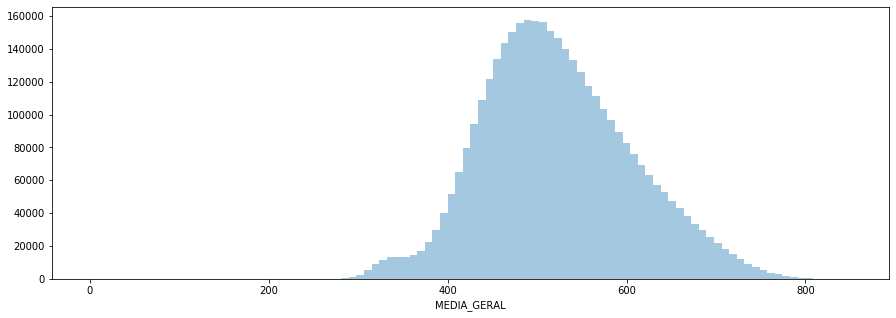

In [30]:
plt.figure(figsize=(15,5))
sns.distplot(dataset['MEDIA_GERAL'], kde=False, bins=100)

In [31]:
#Medai dos canditos por estados 

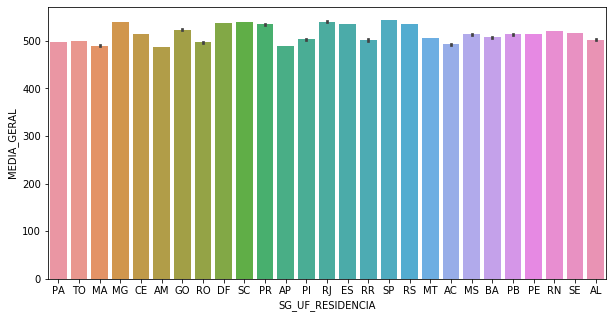

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='SG_UF_RESIDENCIA', y='MEDIA_GERAL', data=dataset)

In [33]:
corr = dataset.corr()

In [34]:
corr

,NU_INSCRICAO,NU_IDADE,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,...,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005,MEDIA_GERAL
NU_INSCRICAO,1.000000,0.073590,0.075237,-0.096766,0.005770,0.086941,0.079565,0.016738,-0.083204,-0.078718,...,-0.083204,0.013665,-0.006399,-0.004879,0.025321,-0.023963,0.022389,-0.073068,-0.031557,-0.023811
NU_IDADE,0.073590,1.000000,0.778143,-0.312943,0.052090,-0.276725,-0.082138,0.010119,-0.201027,-0.208653,...,-0.201027,-0.056845,-0.032498,-0.085970,-0.139390,0.145876,0.056552,-0.167270,-0.133307,-0.138191
TP_ANO_CONCLUIU,0.075237,0.778143,1.000000,-0.430127,0.013607,-0.267545,NaN,NaN,-0.201837,-0.217316,...,-0.201837,0.018426,0.047753,0.018683,-0.051538,0.126988,-0.004527,-0.066168,-0.147945,-0.028193
TP_ESCOLA,-0.096766,-0.312943,-0.430127,1.000000,-0.013425,-0.221365,0.811156,-0.057432,0.158994,0.160498,...,0.158994,0.051999,0.040913,0.034232,0.087851,-0.089620,-0.002075,0.082024,0.064303,0.084040
TP_ENSINO,0.005770,0.052090,0.013607,-0.013425,1.000000,NaN,-0.006815,-0.002763,-0.015351,-0.013577,...,-0.015351,-0.012101,-0.012223,-0.014246,-0.016142,0.007406,0.008156,-0.023199,-0.005087,-0.021146
IN_TREINEIRO,0.086941,-0.276725,-0.267545,-0.221365,NaN,1.000000,NaN,NaN,0.110242,0.126262,...,0.110242,0.028886,0.015729,0.025911,0.055879,-0.110715,0.014567,-0.001331,0.023941,0.022981
TP_DEPENDENCIA_ADM_ESC,0.079565,-0.082138,NaN,0.811156,-0.006815,NaN,1.000000,-0.078053,0.100964,0.088143,...,0.100964,0.342434,0.299706,0.280537,0.348001,-0.154545,-0.056623,0.279917,-0.078168,0.372227
TP_LOCALIZACAO_ESC,0.016738,0.010119,NaN,-0.057432,-0.002763,NaN,-0.078053,1.000000,-0.017866,-0.021586,...,-0.017866,-0.041052,-0.051182,-0.068877,-0.046685,0.055878,0.017594,-0.044110,0.034832,-0.059851
TP_PRESENCA_CN,-0.083204,-0.201027,-0.201837,0.158994,-0.015351,0.110242,0.100964,-0.017866,1.000000,0.878667,...,1.000000,NaN,0.130437,0.119111,NaN,-0.068896,-0.156828,0.184851,0.038034,NaN
TP_PRESENCA_CH,-0.078718,-0.208653,-0.217316,0.160498,-0.013577,0.126262,0.088143,-0.021586,0.878667,1.000000,...,0.878667,0.015424,NaN,NaN,0.010987,-0.065894,NaN,NaN,0.041692,NaN


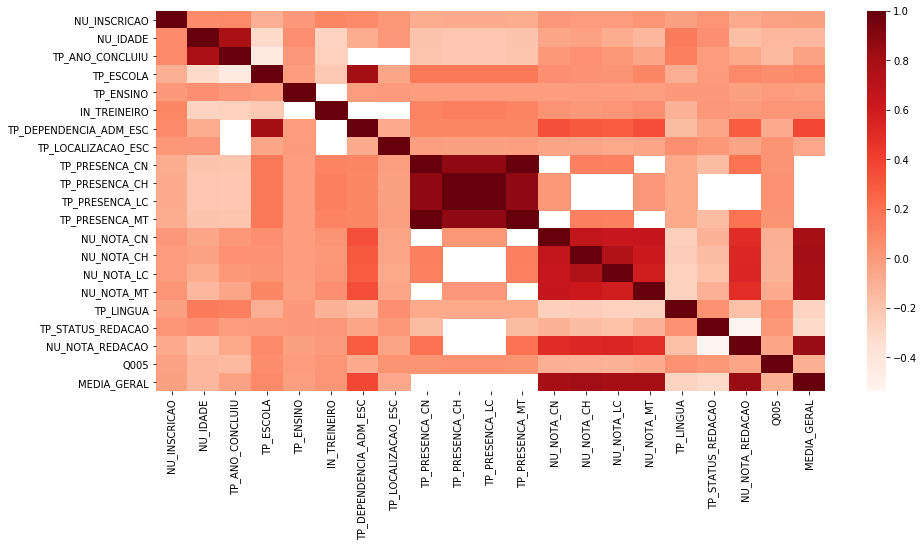

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, cmap='Reds')

## Caracterização do dataset

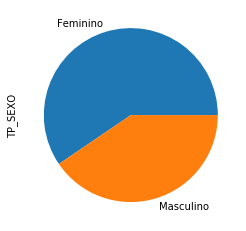

In [36]:
# Inscritos no ENEM 2019
dict_tp_sexo = {"F": "Feminino", "M": "Masculino"}
dataset = dataset.replace({"TP_SEXO": dict_tp_sexo})
dataset['TP_SEXO'].value_counts().plot.pie()

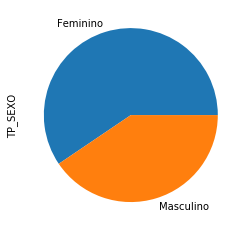

In [37]:
# Presentes (em todas as provas) ENEM 2019
presentes = dataset.query('TP_PRESENCA_CN == 1 & TP_PRESENCA_CH == 1 & TP_PRESENCA_LC == 1 & TP_PRESENCA_MT == 1')
presentes['TP_SEXO'].value_counts().plot.pie()

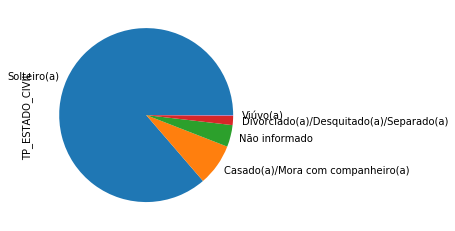

In [38]:
# Estado civil dos incritos no enem 2019
dict_tp_estado_civil = {0: 'Não informado', 1:'Solteiro(a)', 2: 'Casado(a)/Mora com companheiro(a)', 
                        3: 'Divorciado(a)/Desquitado(a)/Separado(a)', 4: 'Viúvo(a)'}
dataset = dataset.replace({"TP_ESTADO_CIVIL": dict_tp_estado_civil})
dataset['TP_ESTADO_CIVIL'].value_counts().plot.pie()

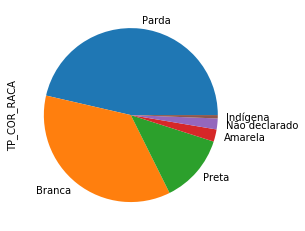

In [39]:
dict_tp_cor_raca = {0: 'Não declarado', 1:'Branca', 2: 'Preta', 
                        3: 'Parda', 4: 'Amarela', 5: 'Indígena'}
dataset = dataset.replace({"TP_COR_RACA": dict_tp_cor_raca})
dataset['TP_COR_RACA'].value_counts().plot.pie()

In [40]:
labels = []
values = []

for y in range(0,120):
    labels.append(str(y))
    values.append(len(dataset[dataset.NU_IDADE == y]))

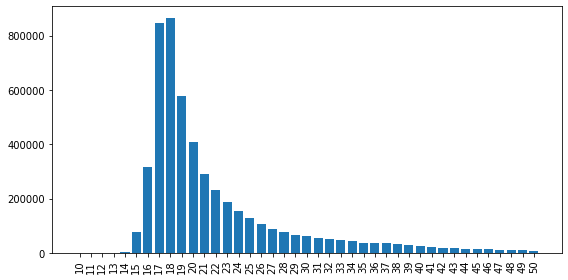

In [41]:
begin, end = 10,50


def render(begin,end):
    _labels = []
    _values = []

    for y in range(begin,end+1):
        _labels.append(labels[y])
        _values.append(values[y])


    plt.clf()
    fig = plt.gcf()
    plt.rcdefaults()
    plt.bar(_labels, _values)
    plt.xticks(rotation=90)
    fig.set_size_inches(8, 4)
    plt.tight_layout()
    plt.show()

render(begin,end)

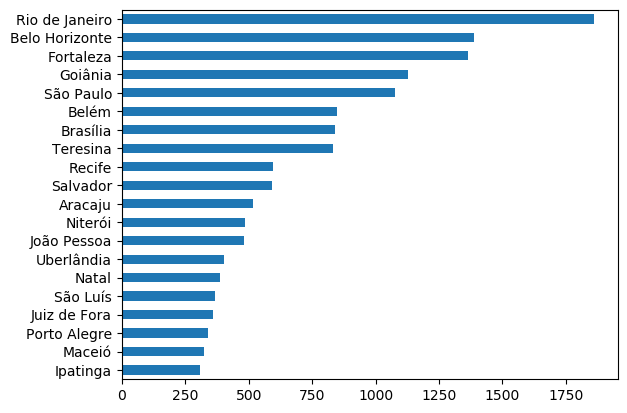

In [42]:
# TOP N Cidades
N = 20
dataset.query('TP_STATUS_REDACAO == 1 and NU_NOTA_REDACAO > 950')['NO_MUNICIPIO_RESIDENCIA'].value_counts().head(N).plot.barh()
plt.gca().invert_yaxis()
